2) Plot the density of energy states at valence and conduction band for each of the materials. The density of states g(E) is proportional to the square root of energy E, and is a function of effective mass of carrier. Then plot the Fermi-level and Fermi-distribution diagram on the same graph, and also plot the number of electrons, n(E) and holes, p(E) at different energies. Your diagram will qualitatively look like the following:

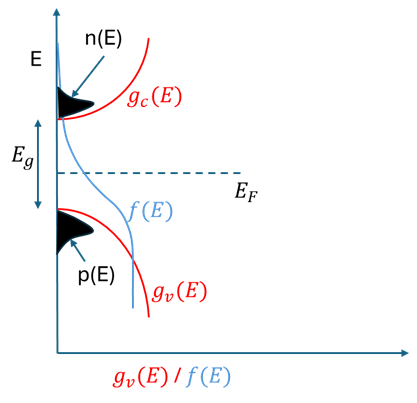


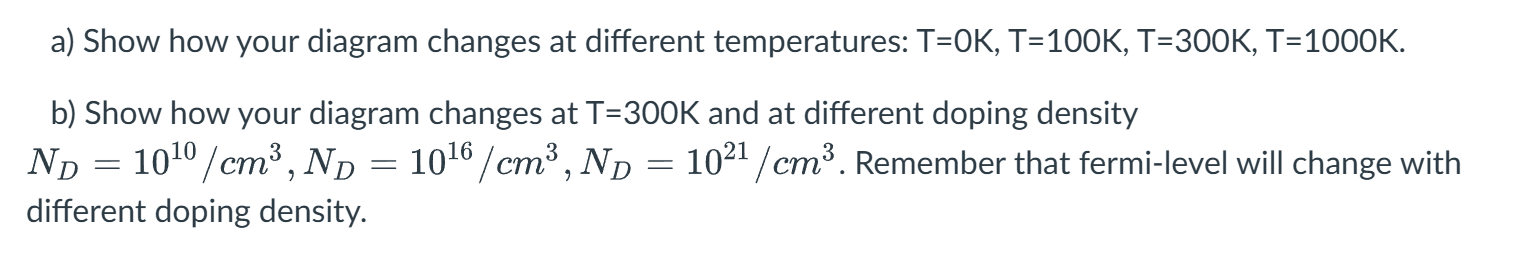


==== SILICON ====


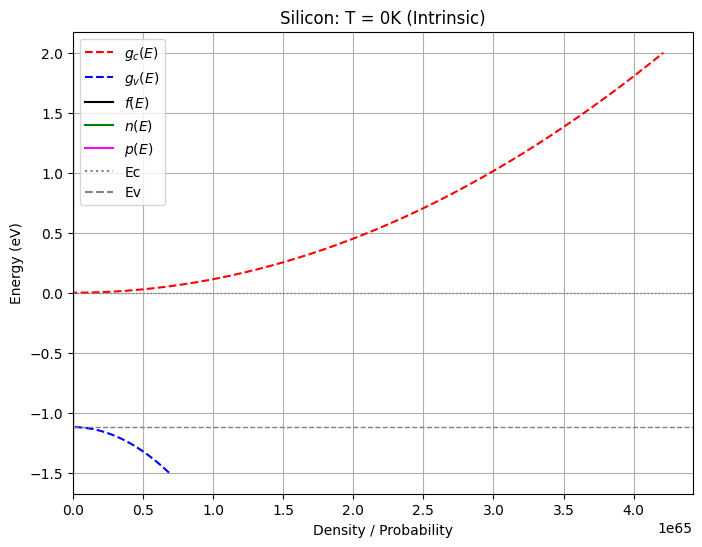

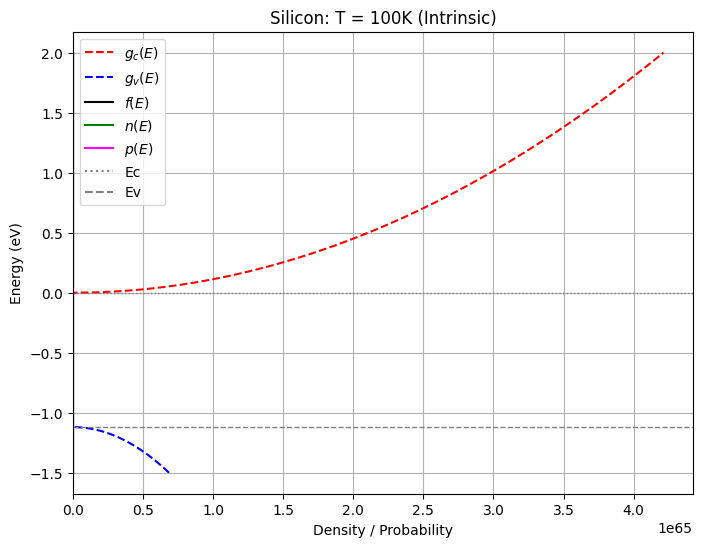

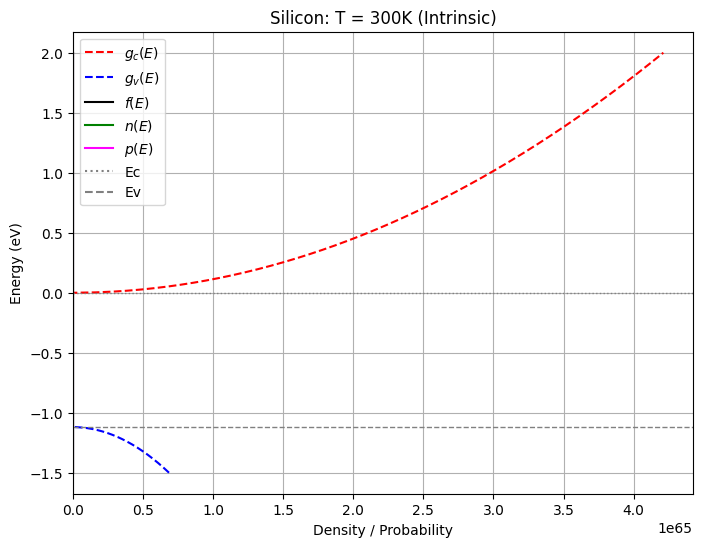

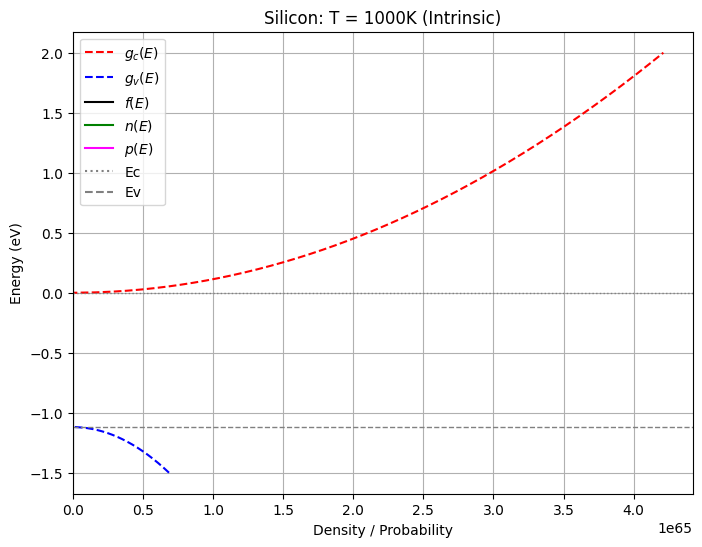

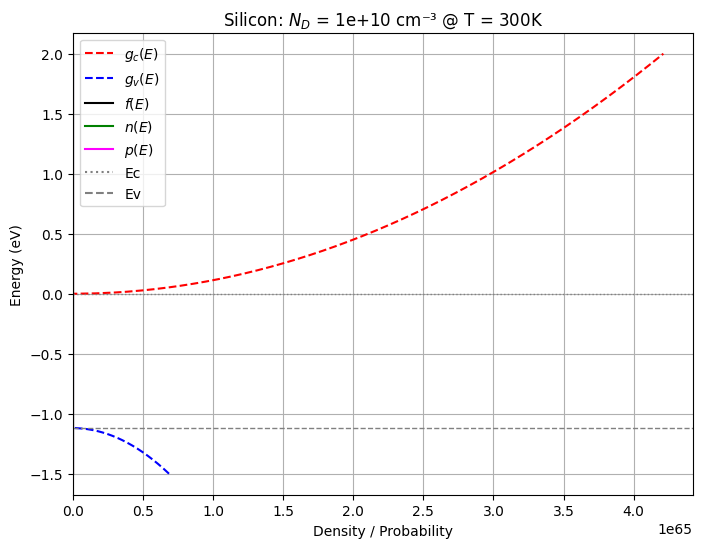

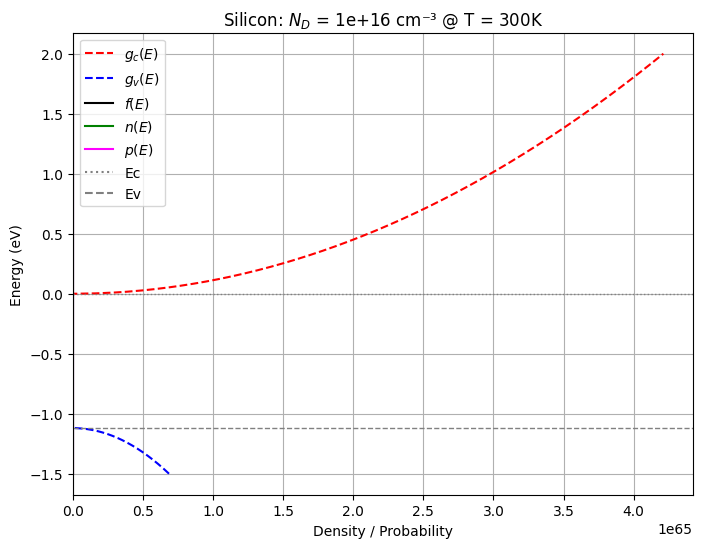

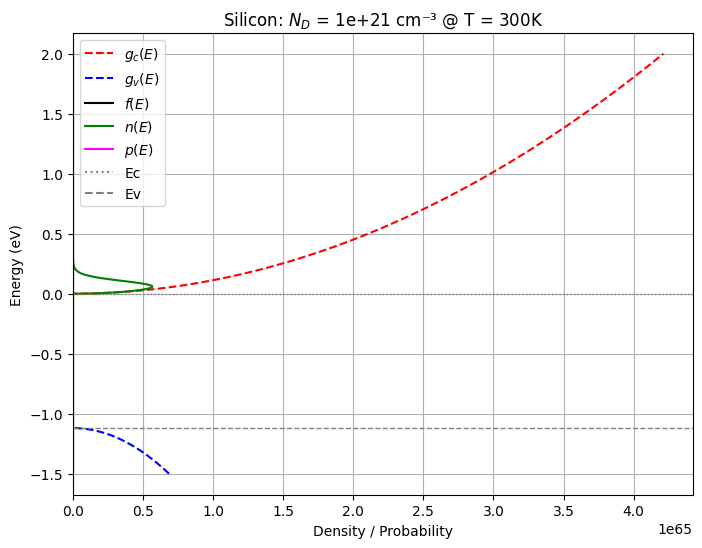


==== GALLIUM ARSENIDE ====


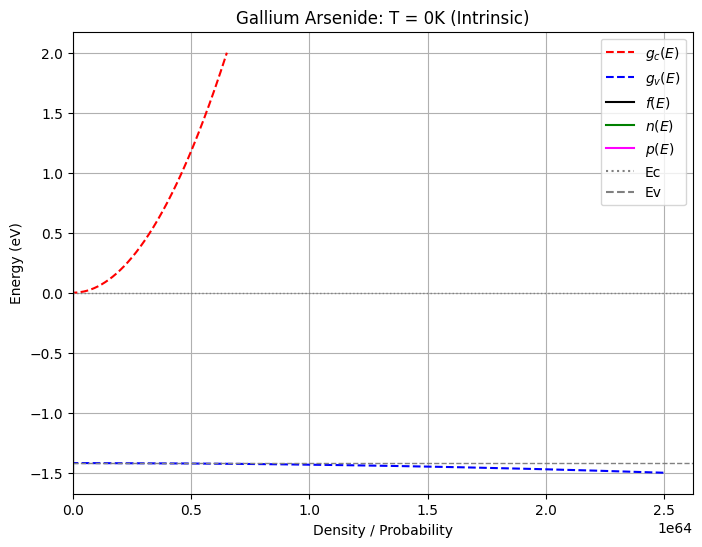

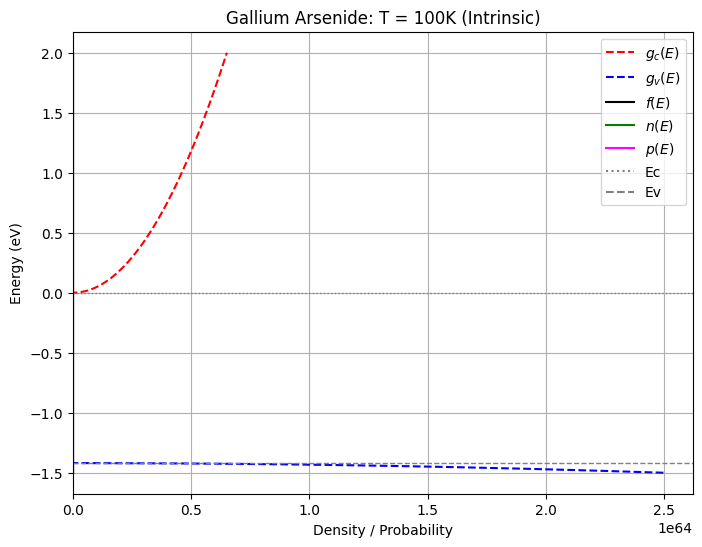

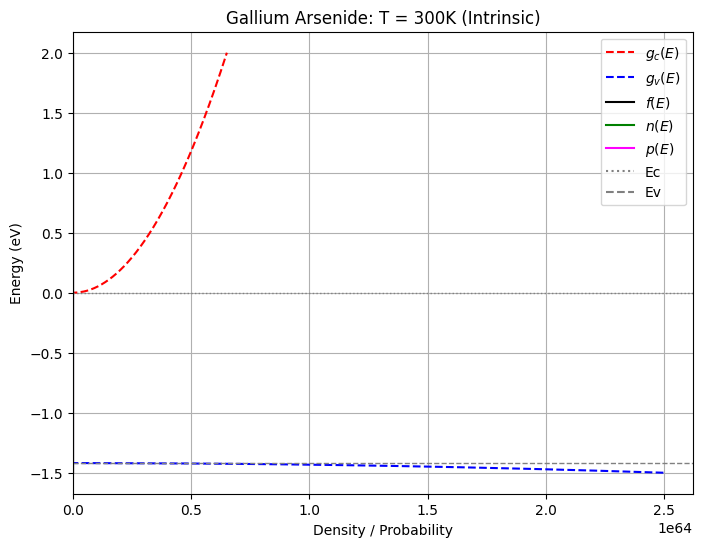

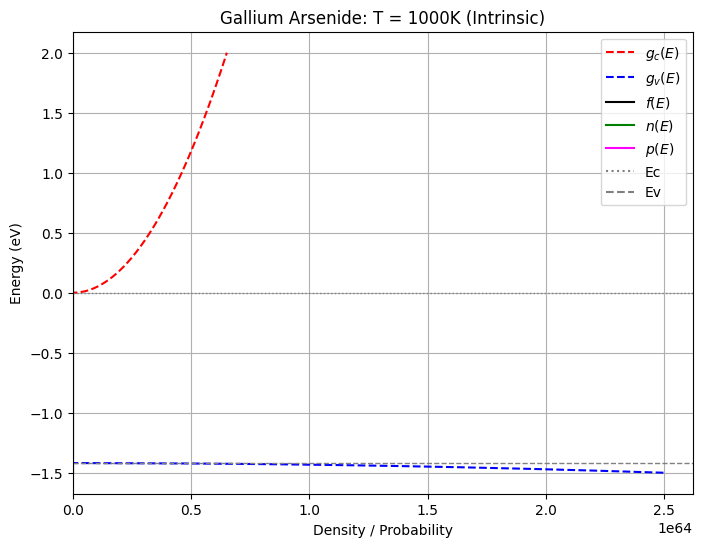

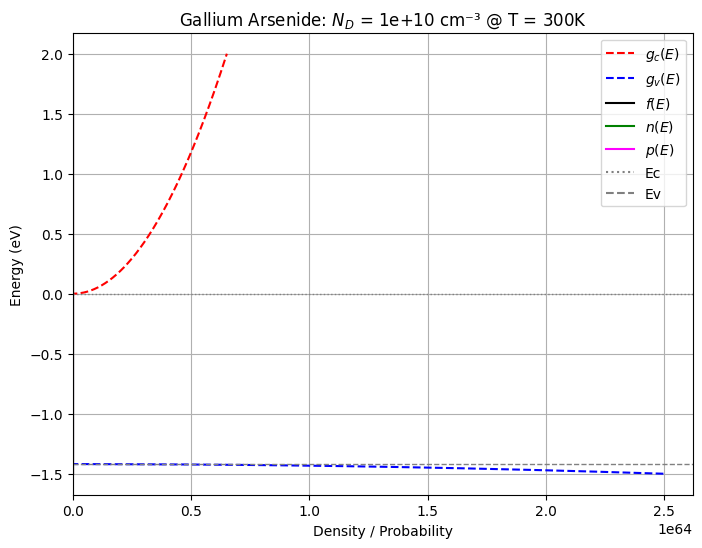

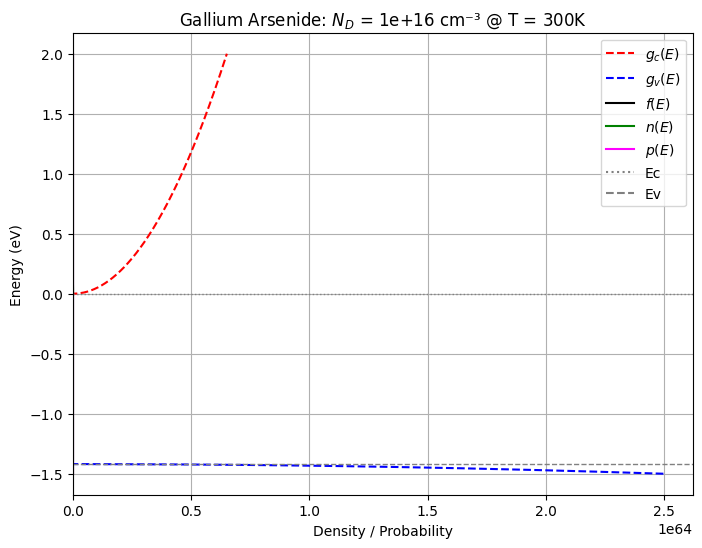

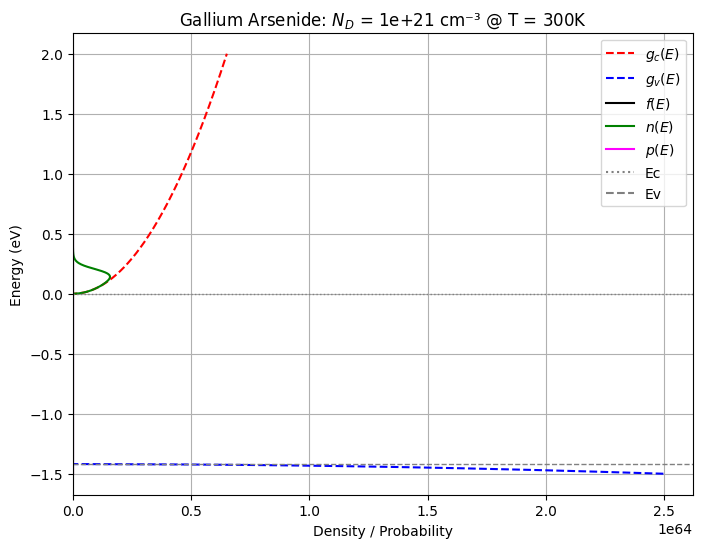

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Constants
hbar = 1.0545718e-34  # J·s
q = 1.60218e-19       # C
k_B = 1.380649e-23    # J/K
m0 = 9.10938356e-31   # kg
h = 2 * np.pi * hbar

# Energy range in eV
E = np.linspace(-1.5, 2.0, 1000)

# Material definitions
materials = {
    'Silicon': {
        'Eg': 1.12,
        'me': 1.08 * m0,
        'mh': 0.56 * m0
    },
    'Gallium Arsenide': {
        'Eg': 1.42,
        'me': 0.067 * m0,
        'mh': 0.48 * m0
    }
}

# DOS functions with safe sqrt
def g_c(E, Ec, me_eff):
    gc = np.zeros_like(E)
    valid = E >= Ec
    gc[valid] = (1 / (2 * np.pi**2)) * ((2 * me_eff / hbar**2) ** 1.5) * np.sqrt((E[valid] - Ec) * q)
    return gc

def g_v(E, Ev, mh_eff):
    gv = np.zeros_like(E)
    valid = E <= Ev
    gv[valid] = (1 / (2 * np.pi**2)) * ((2 * mh_eff / hbar**2) ** 1.5) * np.sqrt((Ev - E[valid]) * q)
    return gv

# Fermi-Dirac distribution
def fermi(E, Ef, T):
    if T == 0:
        return np.where(E < Ef, 1.0, 0.0)
    else:
        return 1 / (1 + np.exp((E - Ef) * q / (k_B * T)))

# Effective DOS
def Nc(T, me_eff):
    return 2 * ((2 * np.pi * me_eff * k_B * T) / h**2) ** (1.5)

# Fermi level for n-type
def Ef_n_type(T, Ec, Nd, me_eff):
    Nc_val = Nc(T, me_eff)
    Nd_m3 = Nd * 1e6
    return Ec - (k_B * T / q) * np.log(Nc_val / Nd_m3)

# Simulation parameters
temps = [0, 100, 300, 1000]
Nd_list = [1e10, 1e16, 1e21]
T_fixed = 300

# Predefine legend handles
legend_handles = [
    Line2D([0], [0], color='red', linestyle='--', label=r'$g_c(E)$'),
    Line2D([0], [0], color='blue', linestyle='--', label=r'$g_v(E)$'),
    Line2D([0], [0], color='black', linestyle='-', label=r'$f(E)$'),
    Line2D([0], [0], color='green', linestyle='-', label=r'$n(E)$'),
    Line2D([0], [0], color='magenta', linestyle='-', label=r'$p(E)$'),
    Line2D([0], [0], color='gray', linestyle=':', label='Ec'),
    Line2D([0], [0], color='gray', linestyle='--', label='Ev')
]

# Main loop
for mat_name, props in materials.items():
    print(f"\n==== {mat_name.upper()} ====")
    Eg = props['Eg']
    Ec = 0
    Ev = -Eg
    me = props['me']
    mh = props['mh']

    # A) Temperature Variation
    for T in temps:
        Ef = (Ec + Ev) / 2
        fc = fermi(E, Ef, T)
        gc = g_c(E, Ec, me)
        gv = g_v(E, Ev, mh)
        n_E = gc * fc
        p_E = gv * (1 - fc)

        plt.figure(figsize=(8, 6))
        plt.plot(gc/q, E, 'r--')
        plt.plot(gv/q, E, 'b--')
        plt.plot(fc, E, 'k-')
        plt.plot(n_E/q, E, 'g-')
        plt.plot(p_E/q, E, 'm-')
        plt.axhline(Ec, color='gray', linestyle=':', linewidth=1)
        plt.axhline(Ev, color='gray', linestyle='--', linewidth=1)
        plt.title(f'{mat_name}: T = {T}K (Intrinsic)')
        plt.xlabel('Density / Probability')
        plt.ylabel('Energy (eV)')
        plt.grid(True)
        plt.legend(handles=legend_handles, loc='best')
        plt.xlim(left=0)
        plt.show()

    # B) Doping Variation
    for Nd in Nd_list:
        Ef = Ef_n_type(T_fixed, Ec, Nd, me)
        fc = fermi(E, Ef, T_fixed)
        gc = g_c(E, Ec, me)
        gv = g_v(E, Ev, mh)
        n_E = gc * fc
        p_E = gv * (1 - fc)

        plt.figure(figsize=(8, 6))
        plt.plot(gc/q, E, 'r--')
        plt.plot(gv/q, E, 'b--')
        plt.plot(fc, E, 'k-')
        plt.plot(n_E/q, E, 'g-')
        plt.plot(p_E/q, E, 'm-')
        plt.axhline(Ec, color='gray', linestyle=':', linewidth=1)
        plt.axhline(Ev, color='gray', linestyle='--', linewidth=1)
        plt.title(f'{mat_name}: $N_D$ = {Nd:.0e} cm⁻³ @ T = {T_fixed}K')
        plt.xlabel('Density / Probability')
        plt.ylabel('Energy (eV)')
        plt.grid(True)
        plt.legend(handles=legend_handles, loc='best')
        plt.xlim(left=0)
        plt.show()
